# Polynomial regression


In [1]:
import os, sys, pathlib

UTILS_FOLDER = "S00 - Utils"
curPath = os.getcwd()
parPath = pathlib.Path(curPath).parent
utilPath = os.path.join(parPath, UTILS_FOLDER)
for p in [curPath, str(parPath), utilPath]:
    sys.path.append(p)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from utils import plot_reg, plot_res, store_results
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Load data
df = pd.read_excel(
    f"{utilPath}/housing_data.xlsx",
)

# Extract data
X = df[["LSTAT"]].values
y = df["MEDV"].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
paramSet = {}
for i in range(1, 11):
    paramSet[str(i)] = {"degree": i}
print(paramSet)

{'1': {'degree': 1}, '2': {'degree': 2}, '3': {'degree': 3}, '4': {'degree': 4}, '5': {'degree': 5}, '6': {'degree': 6}, '7': {'degree': 7}, '8': {'degree': 8}, '9': {'degree': 9}, '10': {'degree': 10}}


,Model,Coef,Intercept,MSE Train,MSE Test,R2 Train,R2 Test,Params
0,Poly-1,0.968141,34.789781,37.933978,39.817151,0.552478,0.521805,"{""degree"": 1}"
1,Poly-2,2.424139,43.319527,29.000487,33.602395,0.657870,0.596443,"{""degree"": 2}"
2,Poly-3,3.991573,49.114797,27.541105,32.091677,0.675087,0.614586,"{""degree"": 3}"
3,Poly-4,6.486311,55.725243,26.760597,29.843976,0.684295,0.641581,"{""degree"": 4}"
4,Poly-5,11.925051,66.660507,25.901907,29.847013,0.694425,0.641544,"{""degree"": 5}"
5,Poly-6,13.380107,68.995861,25.886222,29.548298,0.694610,0.645132,"{""degree"": 6}"
6,Poly-7,14.370653,70.318772,25.883990,29.671707,0.694636,0.643649,"{""degree"": 7}"
7,Poly-8,5.142093,49.633621,25.649690,31.822934,0.697401,0.617814,"{""degree"": 8}"
8,Poly-9,15.197590,39.978496,25.625960,30.440141,0.697681,0.634421,"{""degree"": 9}"
9,Poly-10,3.981174,58.577846,25.620631,35.162539,0.697743,0.577706,"{""degree"": 10}"


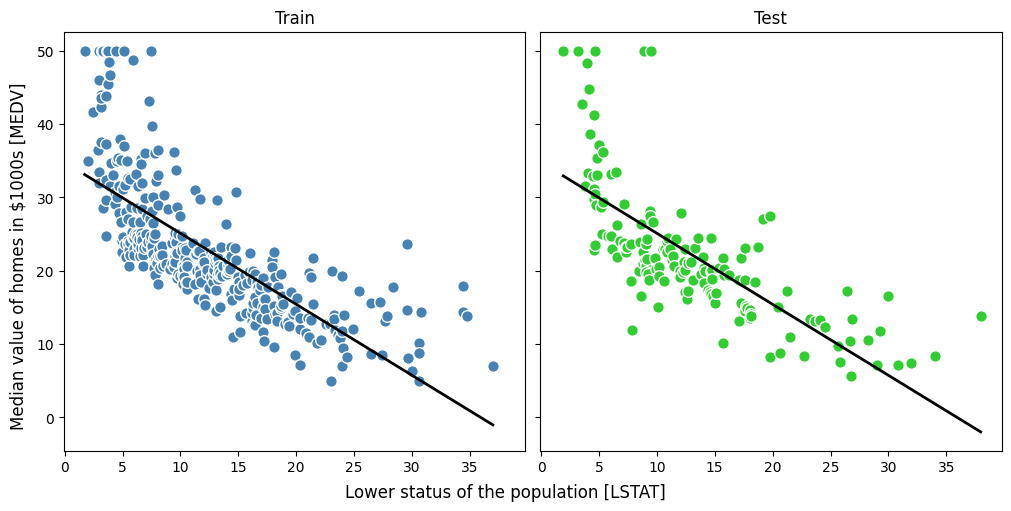

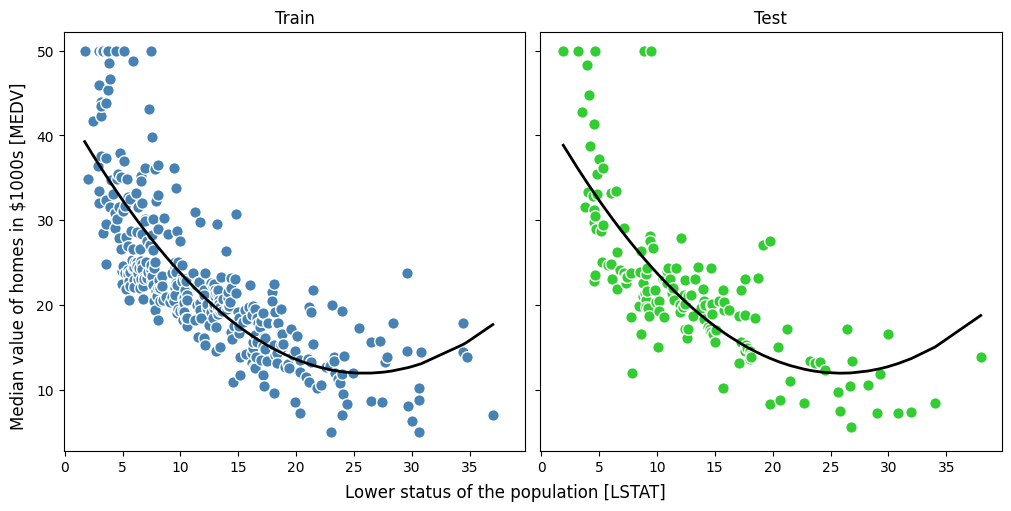

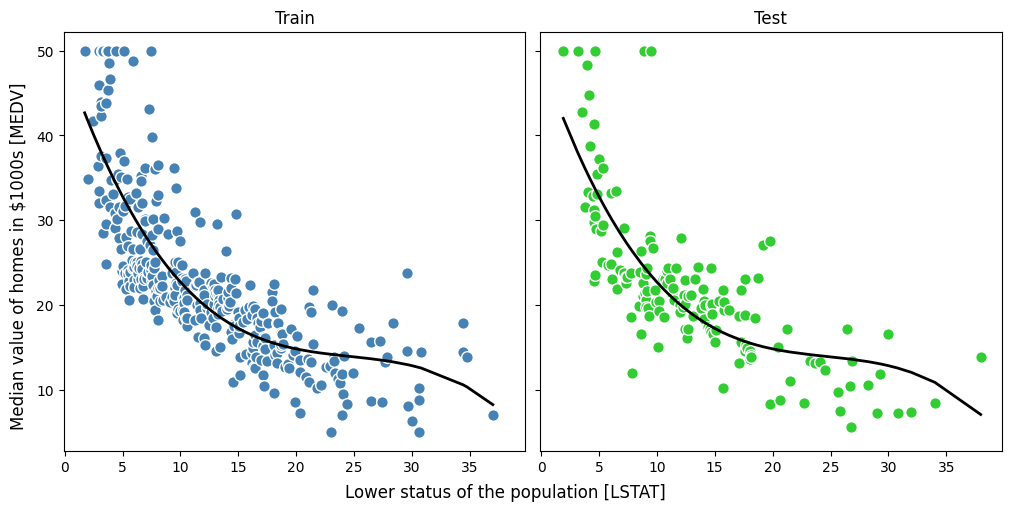

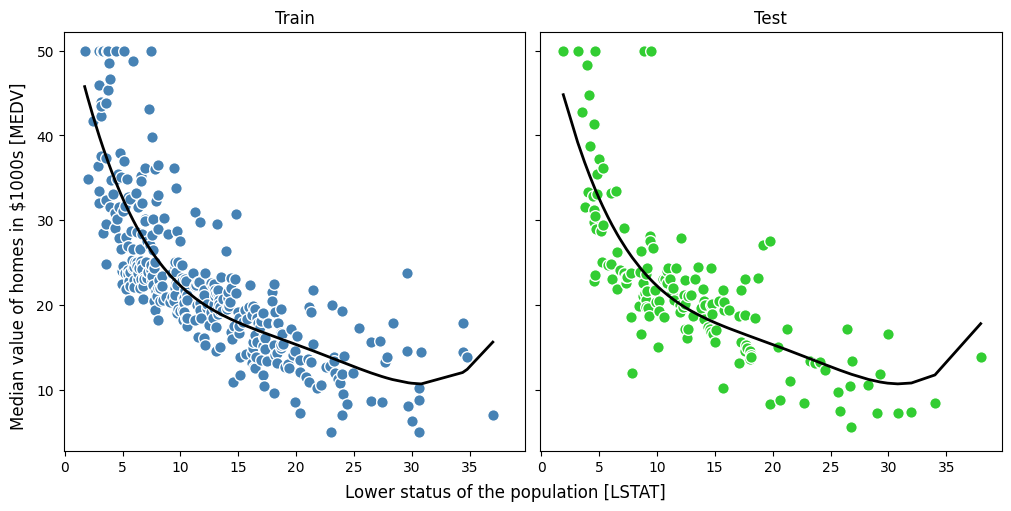

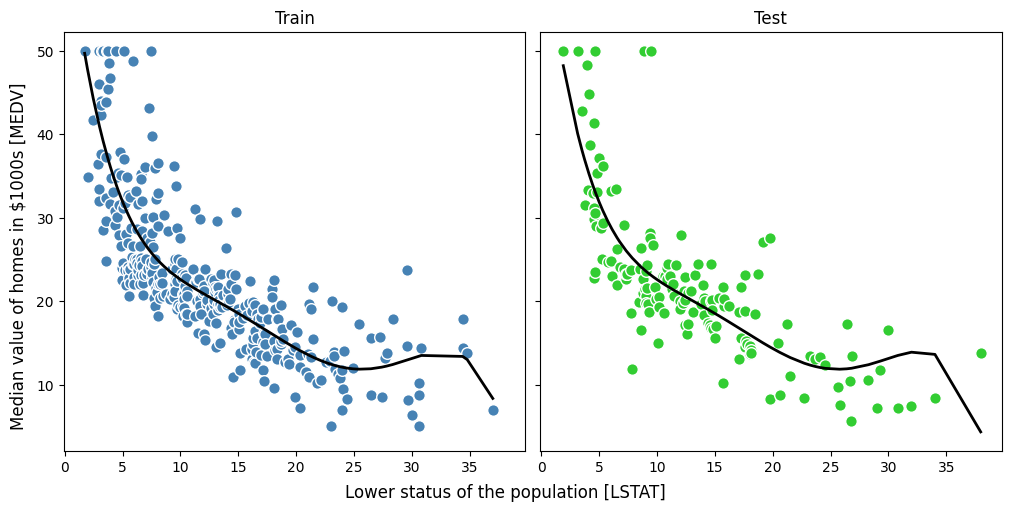

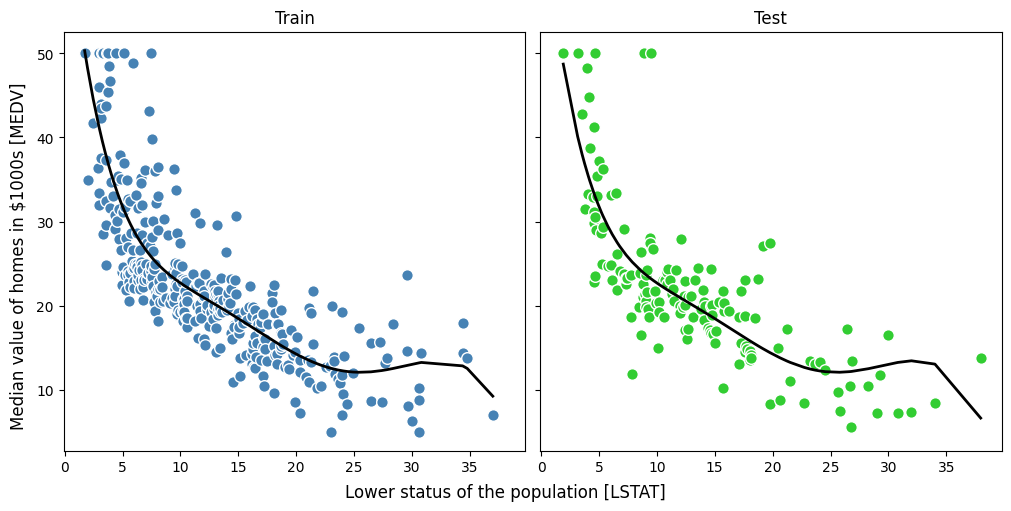

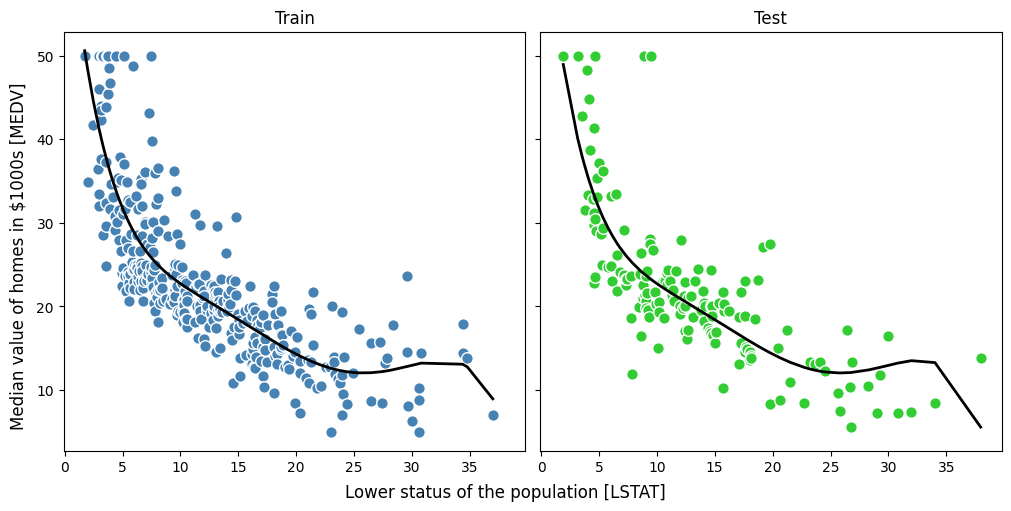

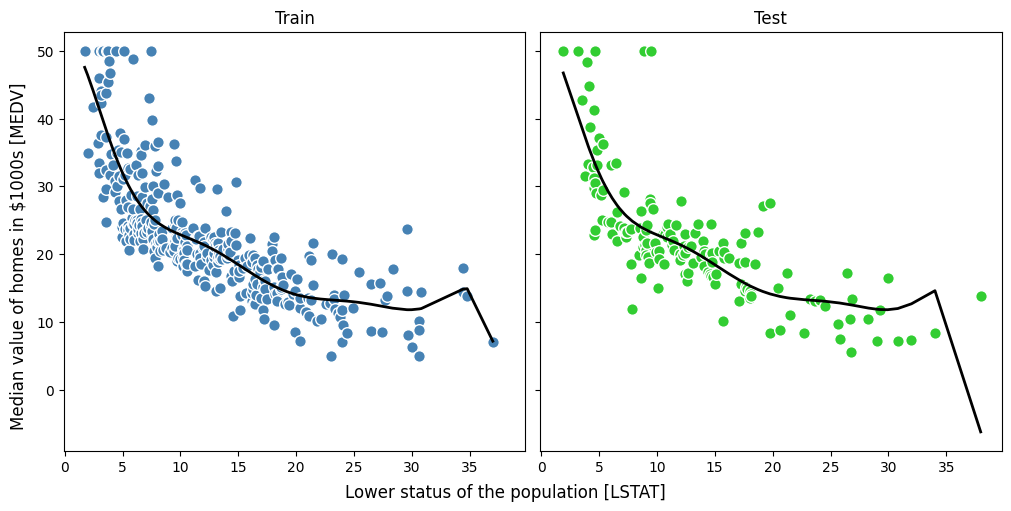

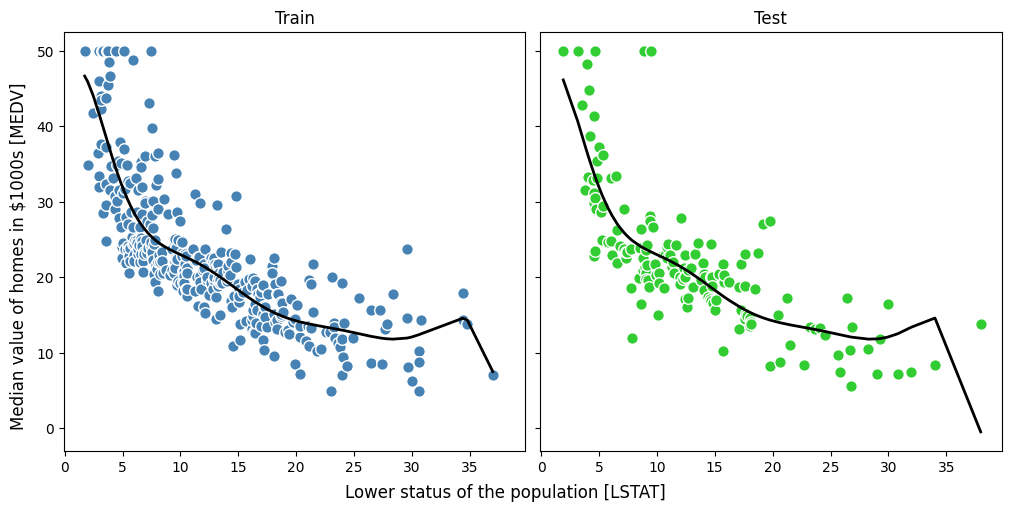

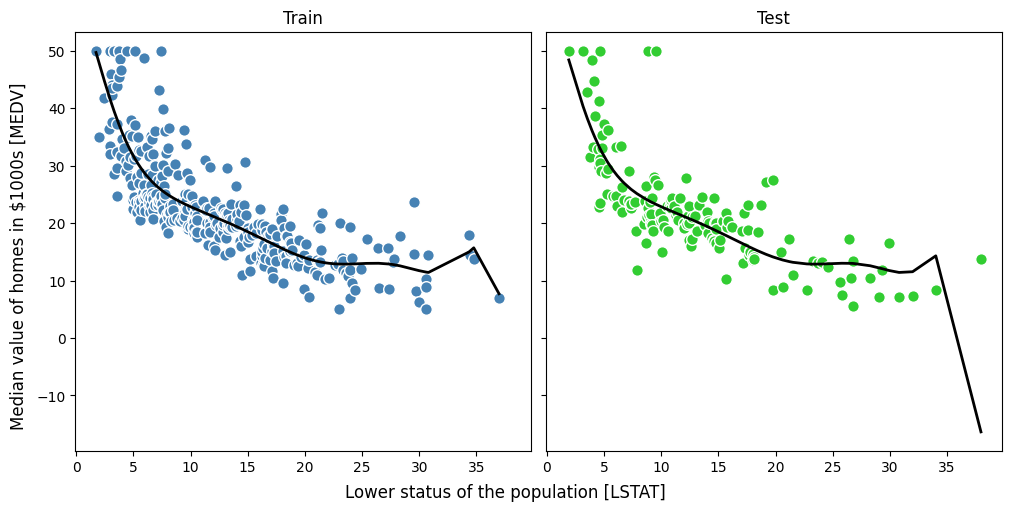

In [5]:
results = []

for name, values in paramSet.items():
    # Create polynomial features
    poly = PolynomialFeatures(**values)

    # Transform X into multiple columns
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit using linear regression
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)

    # Predict
    y_train_pred = lr.predict(X_train_poly)
    y_test_pred = lr.predict(X_test_poly)

    # Store results
    store_results(
        results=results,
        model_name=f"Poly-{name}",
        model=lr,
        y_train=y_train,
        y_test=y_test,
        y_train_pred=y_train_pred,
        y_test_pred=y_test_pred,
        params=values,
    )

    # Plotting
    plot_reg(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)
    # plot_res(y_train, y_test, y_train_pred, y_test_pred)

df = pd.DataFrame.from_records(results)
display(df)